In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline
   
import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change

from google.colab import drive
drive.mount("/content/drive")
#Change current working directory to gdrive
%cd /gdrive
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/drive
[Errno 2] No such file or directory: '/gdrive'
/content


In [2]:
#Loading the data
trainfile = r'/content/drive/MyDrive/CIS508/Assignment_4/southgermancr.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe

print(trainData.shape)

(1000, 21)


# **South German Credit** 




**EDA**

In [3]:
#Dataset copy
data=trainData.copy()

In [4]:
data.shape
data.info()
print(data.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

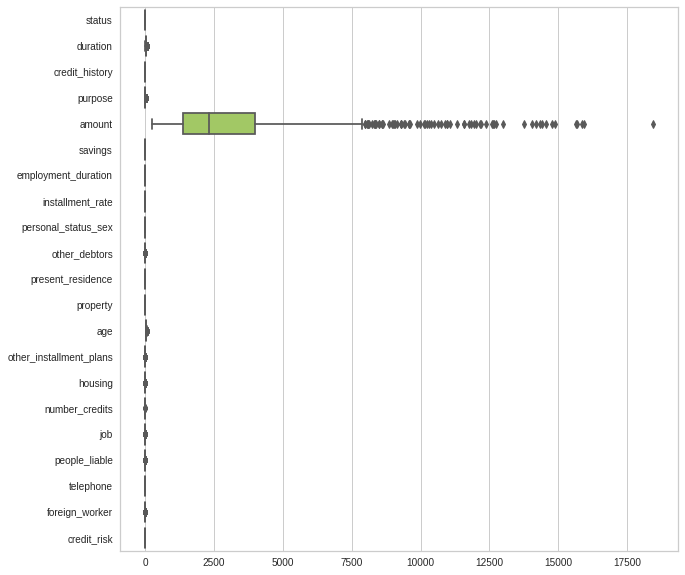

In [5]:
#Overall outlier check
plt.figure(figsize = (10,10))
sns.boxplot(data=data, orient = 'h', palette = 'Set2')

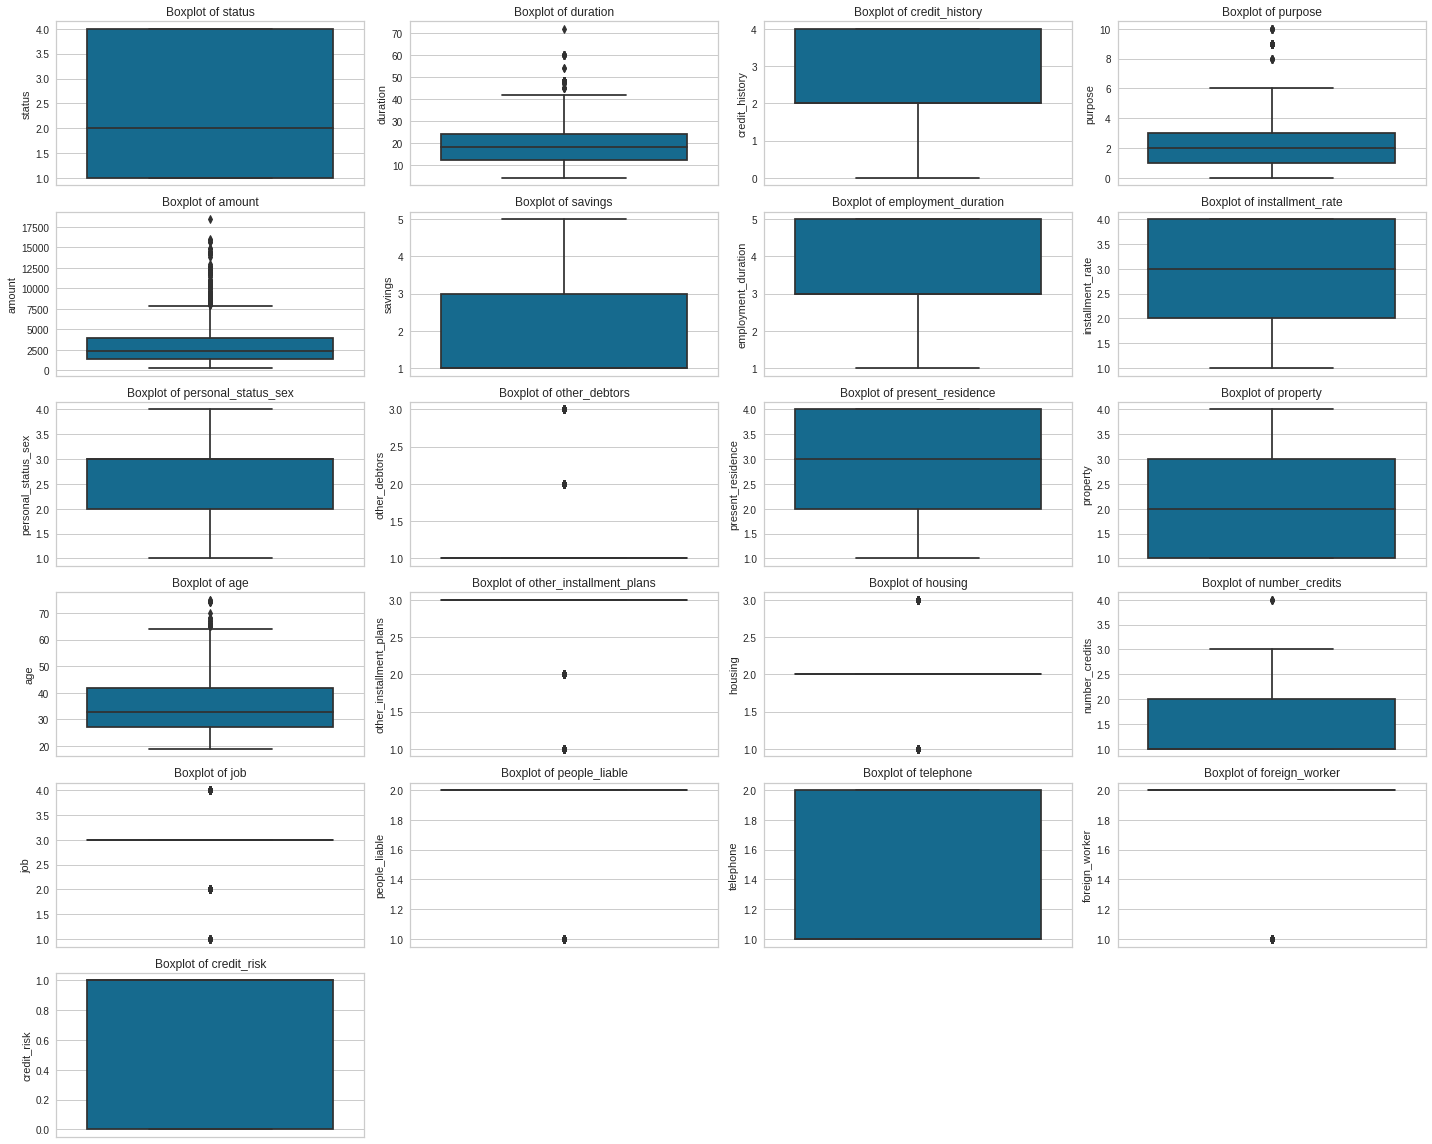

In [ ]:
#individual outlier check

plt.figure(figsize = (20,16))
Features = data.columns
for i in range(len(Features)):
    plt.subplot(6,4, i + 1)
    sns.boxplot(y = data[Features[i]], data = data)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

**Pre Processing**

In [6]:
#Change Outlier to Upper-lower value

#'amount' column outlier change
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['amount']=np.where(data['amount']>upper_whisker,upper_whisker,np.where(data['amount']<lower_whisker,lower_whisker,data['amount']))

#'duration' column outlier change
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['duration']=np.where(data['duration']>upper_whisker,upper_whisker,np.where(data['duration']<lower_whisker,lower_whisker,data['duration']))



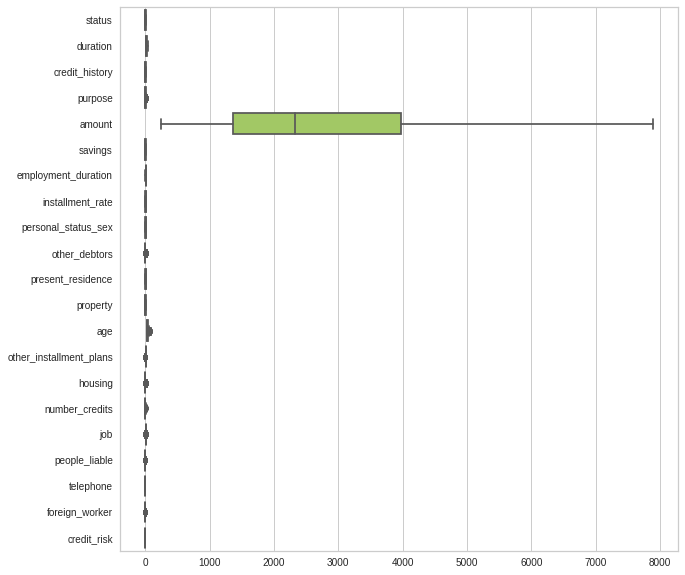

In [7]:
#Outliere check after pre-processeing 
plt.figure(figsize = (10,10))
sns.boxplot(data=data, orient = 'h', palette = 'Set2')

In [8]:
#save_target column
y_data=data["credit_risk"]

#extracting training data without the target column
data=data.drop(["credit_risk"],axis=1) 


**Modelling**


K-Means model development 

In [9]:
df1=data.copy()

In [10]:
#K-Means Clustering ========================================================================
sil_score = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state = 0)
    k_means.fit(df1)
    labels = k_means.labels_
    score = silhouette_score(df1,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of 2 clusters : 0.7069245873814418
The Silhouette Score of 3 clusters : 0.6383057282313973
The Silhouette Score of 4 clusters : 0.6036372172717483
The Silhouette Score of 5 clusters : 0.6055692608893509
The Silhouette Score of 6 clusters : 0.6057031033344231
The Silhouette Score of 7 clusters : 0.5793300485524973
The Silhouette Score of 8 clusters : 0.6043718663396267
The Silhouette Score of 9 clusters : 0.598975861217627
The Silhouette Score of 10 clusters : 0.5905311446809959


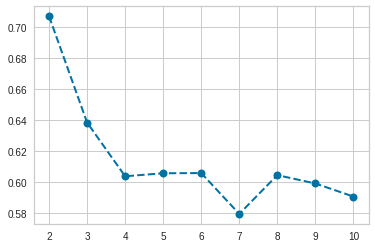

In [11]:
plt.plot(range(2,11),sil_score, marker='o', linestyle='dashed',
...      linewidth=2, markersize=8);

Hyperparameter Tunning for Kmeans model

In [12]:
sil_score = []
for i in ("k-means++", "random"):
    k_means = KMeans(n_clusters = 6,random_state = 0,init=i)
    k_means.fit(df1)
    labels = k_means.labels_
    score = silhouette_score(df1,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of k-means++ clusters : 0.6057031033344231
The Silhouette Score of random clusters : 0.6057031033344231


In [13]:
sil_score = []
for i in ("auto", "full", "elkan"):
    k_means = KMeans(n_clusters = 6,random_state = 0, algorithm=i)
    k_means.fit(df1)
    labels = k_means.labels_
    score = silhouette_score(df1,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of auto clusters : 0.6057031033344231
The Silhouette Score of full clusters : 0.6057031033344231
The Silhouette Score of elkan clusters : 0.6057031033344231


In [14]:
sil_score = []
for i in range(2,30):
    k_means = KMeans(n_clusters = 6,random_state = 0, n_init=i)
    k_means.fit(df1)
    labels = k_means.labels_
    score = silhouette_score(df1,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")


The Silhouette Score of 2 clusters : 0.5522892153641827
The Silhouette Score of 3 clusters : 0.6057031033344231
The Silhouette Score of 4 clusters : 0.6057031033344231
The Silhouette Score of 5 clusters : 0.6057031033344231
The Silhouette Score of 6 clusters : 0.6057031033344231
The Silhouette Score of 7 clusters : 0.6057031033344231
The Silhouette Score of 8 clusters : 0.6057031033344231
The Silhouette Score of 9 clusters : 0.6057031033344231
The Silhouette Score of 10 clusters : 0.6057031033344231
The Silhouette Score of 11 clusters : 0.6057031033344231
The Silhouette Score of 12 clusters : 0.6057031033344231
The Silhouette Score of 13 clusters : 0.6057031033344231
The Silhouette Score of 14 clusters : 0.6057031033344231
The Silhouette Score of 15 clusters : 0.6057031033344231
The Silhouette Score of 16 clusters : 0.6057031033344231
The Silhouette Score of 17 clusters : 0.6028334863269524
The Silhouette Score of 18 clusters : 0.6028334863269524
The Silhouette Score of 19 clusters : 0

In [15]:
#final model

k_means = KMeans(n_clusters = 6,random_state = 0,n_init=17)
k_means.fit(df1)
labels=k_means.labels_
df1['cluster']=labels

#adding target column
df1["credit_risk"]=y_data

#save as csv file
export_csv = df1.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South.csv')



**Cluster Characteristics review**

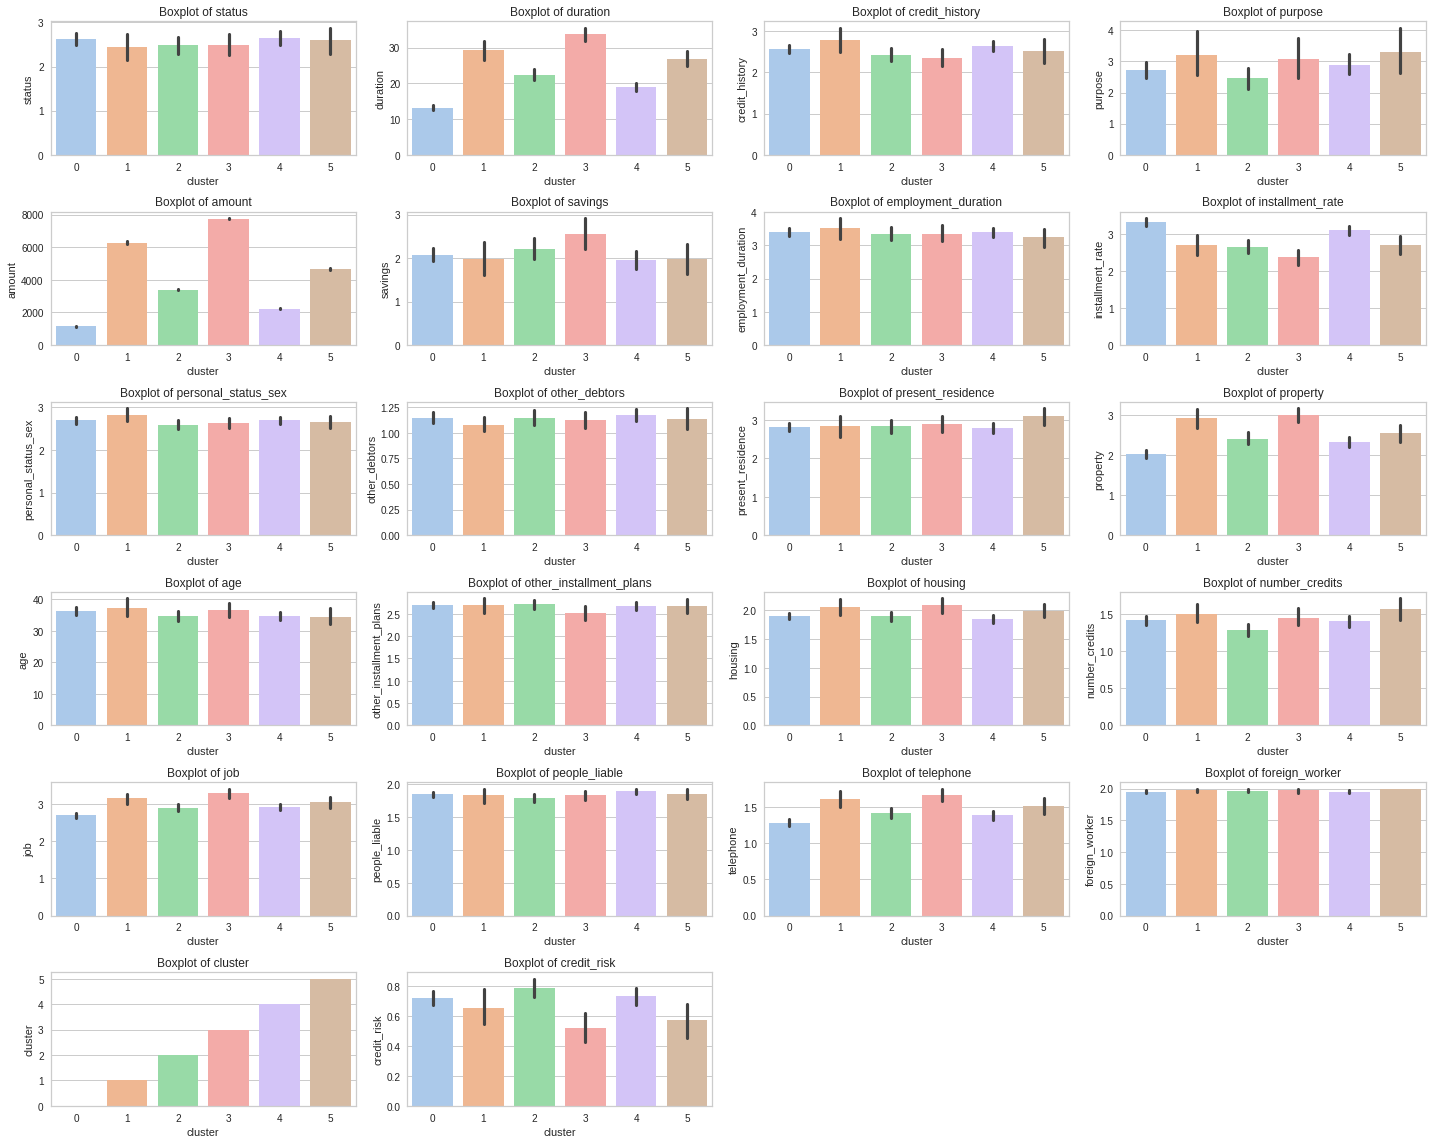

In [16]:
plt.figure(figsize = (20,16))
Features = df1.columns
for i in range(len(Features)):
    plt.subplot(6,4, i + 1)
    sns.barplot(x = 'cluster', y = df1[Features[i]], data = df1, palette="pastel")
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

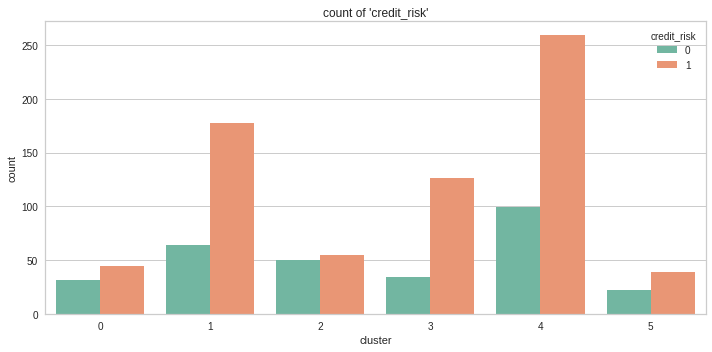

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='cluster',hue='credit_risk',data=df1, palette="Set2")
plt.title(f"count of '{Features[i]}'")
plt.tight_layout()
plt.show()

<Figure size 1440x1152 with 0 Axes>

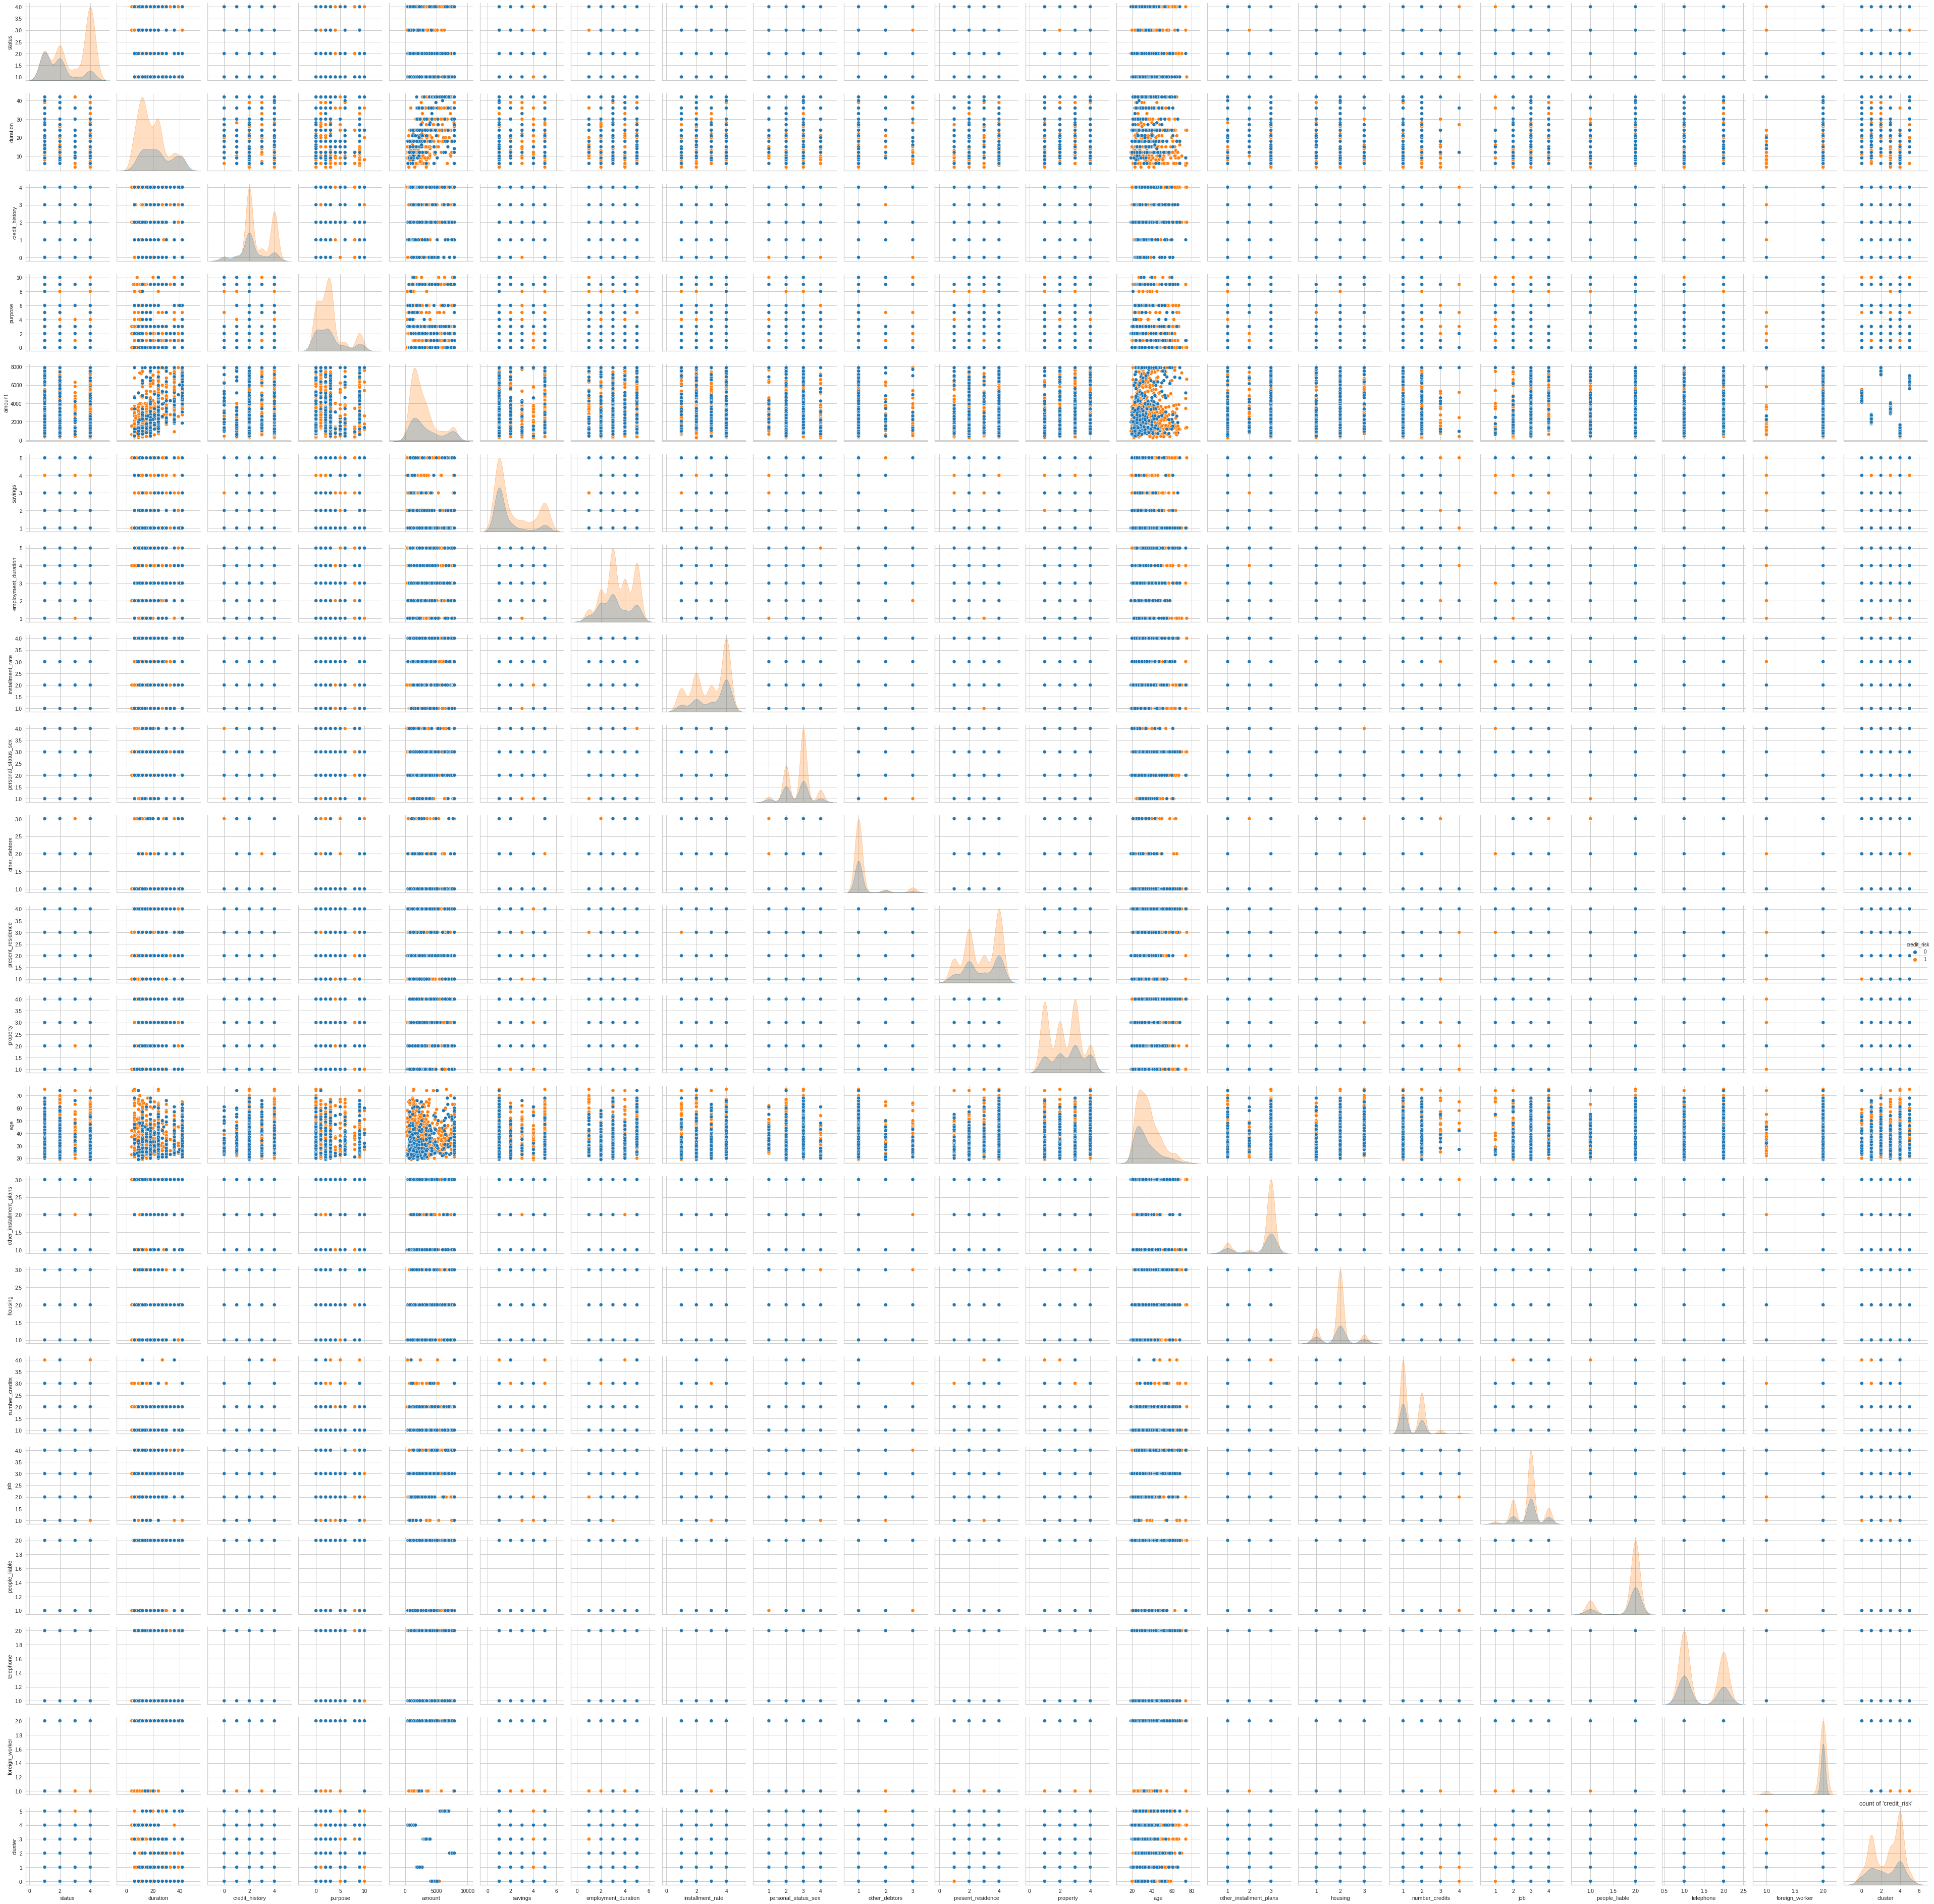

In [ ]:
plt.figure(figsize = (20,16))
sns.pairplot(df1, hue='credit_risk', palette="tab10")
plt.title(f"count of '{Features[i]}'")
plt.tight_layout()
plt.show()

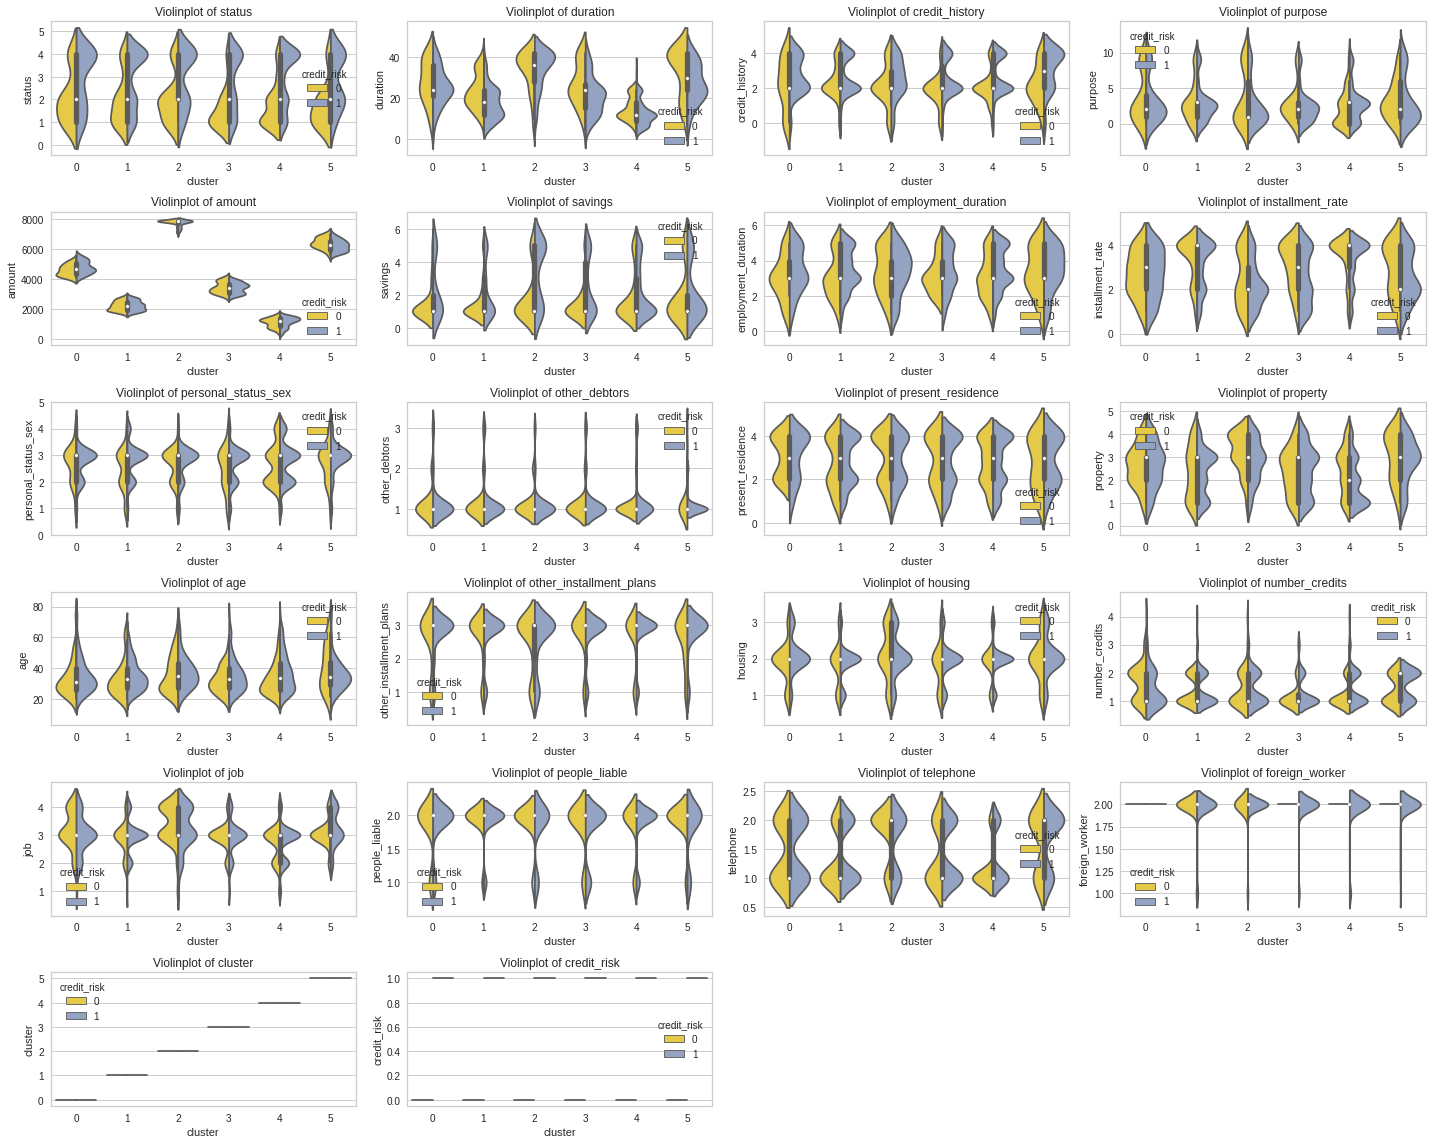

In [ ]:
plt.figure(figsize = (20,16))
Features = df1.columns
for i in range(len(Features)):
    plt.subplot(6,4, i + 1)
    sns.violinplot(x = 'cluster', y = df1[Features[i]], hue='credit_risk', data = df1, split=True, palette="Set2_r")
    plt.title(f"Violinplot of {Features[i]}")
    plt.tight_layout()

**Additional Trial : Data Scaling and PDA for Visualization**


Data Scaling & PCA (Principle Component Analysis)

In [17]:
df2=data.copy()

In [18]:
# Standardize data
from sklearn.preprocessing import StandardScaler
sts = StandardScaler() 
sts.fit(df2)
scaled_df = pd.DataFrame(sts.transform(df2),columns=df2.columns)

In [19]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_df)
scaled_df= pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2"]))


K-Means Modeling 

In [20]:
#K-Means Clustering ========================================================================
k_means = KMeans(n_clusters = 6,random_state = 0,init="k-means++")
k_means.fit(scaled_df)
labels=k_means.labels_
scaled_df["cluster"]=labels


In [21]:
  score = silhouette_score(scaled_df,labels, random_state = 0)
  sil_score.append(score)
  print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of 21 clusters : 0.5096992801751667


In [22]:
#adding target column
scaled_df["credit_risk"]=y_data

#saving pca data for vc
df_pca=scaled_df.copy()
df_pca['cluster']=k_means.labels_

#merging cluster column with orginal data
df_pca['cluster']=k_means.labels_
df=df_pca

#save as csv file
export_csv = scaled_df.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South_Sc_PCA.csv')

Visualization

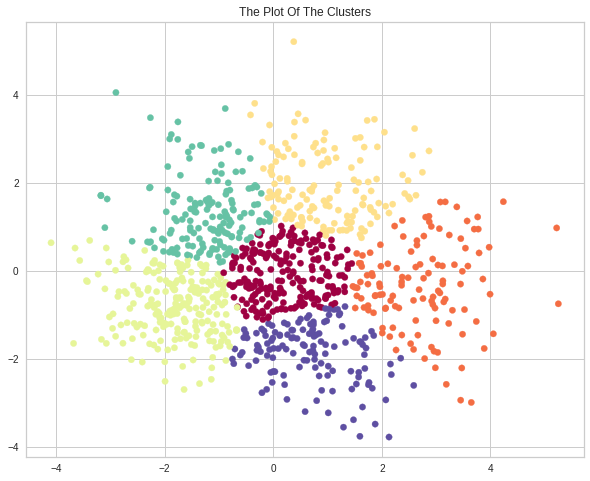

In [ ]:
x = df['col1']
y = df['col2']

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=df['cluster'], marker='o',cmap='Spectral')
ax.set_title("The Plot Of The Clusters")
plt.show()

**Clustering Model Comparison**

Kmeans Model Comaparison with hyperparameter Tunning

In [23]:
df4=data.copy()

In [24]:
#K-Means Clustering (k=3, init="k-means++")
k_means = KMeans(n_clusters = 3,random_state = 0,init="k-means++")
k_means.fit(df4)
labels=k_means.labels_
df4["cluster"]=labels

#adding target column
df4["credit_risk"]=y_data

#save as csv file
export_csv = df4.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South_k3.csv')


In [26]:
df5=data.copy()

In [27]:
#K-Means Clustering (k=10, n_init=10)
k_means = KMeans(n_clusters = 10,random_state = 0, n_init=10)
k_means.fit(df5)
labels=k_means.labels_
df5["cluster"]=labels

#adding target column
df5["credit_risk"]=y_data

#save as csv file
export_csv = df5.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South_k10.csv')

In [28]:
df6=data.copy()

In [29]:
#K-Means Clustering (k=20, algorithm="elkan")
k_means = KMeans(n_clusters = 20,random_state = 0,algorithm="elkan")
k_means.fit(df6)
labels=k_means.labels_
df6["cluster"]=labels

#adding target column
df6["credit_risk"]=y_data

#save as csv file
export_csv = df6.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South_k20.csv')

In [30]:
df7=data.copy()

In [31]:
#K-Means Clustering (k=30, algorithm="full")
k_means = KMeans(n_clusters = 30,random_state = 0,algorithm="full")
k_means.fit(df7)
labels=k_means.labels_
df7["cluster"]=labels

#adding target column
df7["credit_risk"]=y_data

#save as csv file
export_csv = df7.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_South_k30.csv')

Kmeans Model Compararision with Addtional hyperparameter Tunning

In [32]:
df0=data.copy()

In [33]:
#Clustering Evaluation (hyper parameter Tunning

#model 1. Kmeans (k=3, init="k-means++")
function_list=['size','sum']
result4=df4.groupby('cluster').credit_risk.agg(function_list)
result4['Bad_credit']=result4['size']-result4['sum']
result4['Bad_credit_rate']=(result4['size']-result4['sum'])/result4['size']*100
result4.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result4=result4.sort_values(by='Bad_Credit_rate',ascending=False)
print(result4)

#model 2 Kmeans (k=10, n_init=10)
function_list=['size','sum']
result5=df5.groupby('cluster').credit_risk.agg(function_list)
result5['Bad_credit']=result5['size']-result5['sum']
result5['Bad_credit_rate']=(result5['size']-result5['sum'])/result5['size']*100
result5.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result5=result5.sort_values(by='Bad_Credit_rate',ascending=False)
print(result5)

#model 3 Kmeans (k=20, algorithm="elkan")
function_list=['size','sum']
result6=df6.groupby('cluster').credit_risk.agg(function_list)
result6['Bad_credit']=result6['size']-result6['sum']
result6['Bad_credit_rate']=(result6['size']-result6['sum'])/result6['size']*100
result6.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result6=result6.sort_values(by='Bad_Credit_rate',ascending=False)
print(result6)

#model 4 Kmeans (k=30, algorithm="full")
function_list=['size','sum']
result7=df7.groupby('cluster').credit_risk.agg(function_list)
result7['Bad_credit']=result7['size']-result7['sum']
result7['Bad_credit_rate']=(result7['size']-result7['sum'])/result7['size']*100
result7.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result7=result7.sort_values(by='Bad_Credit_rate',ascending=False)
print(result7)



         Total  Good_Credit  Bad_Credit  Bad_Credit_rate
cluster                                                 
1          170           98          72        42.352941
2          285          206          79        27.719298
0          545          396         149        27.339450
         Total  Good_Credit  Bad_Credit  Bad_Credit_rate
cluster                                                 
1          104           54          50        48.076923
9           53           28          25        47.169811
5           51           30          21        41.176471
8          119           81          38        31.932773
6          115           82          33        28.695652
0          103           76          27        26.213592
3          233          175          58        24.892704
7           89           69          20        22.471910
2           33           26           7        21.212121
4          100           79          21        21.000000
         Total  Good_Credit  Ba

In [34]:
#Clustering Evaluation (Addtional Preprocessgin Data )

#model 5. Kmeans (k=6, init="k-means++")
function_list=['size','sum']
result=df1.groupby('cluster').credit_risk.agg(function_list)
result['Bad_credit']=result['size']-result['sum']
result['Bad_credit_rate']=(result['size']-result['sum'])/result['size']*100
result.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result=result.sort_values(by='Bad_Credit_rate',ascending=False)
print(result)


#model 6. with scaling and PCA
function_list=['size','sum']
result2=df.groupby('cluster').credit_risk.agg(function_list)
result2['Bad_credit']=result2['size']-result2['sum']
result2['Bad_credit_rate']=(result2['size']-result2['sum'])/result2['size']*100
result2.columns =['Total','Good_Credit','Bad_Credit','Bad_Credit_rate']
result2=result2.sort_values(by='Bad_Credit_rate',ascending=False)
print(result2)

         Total  Good_Credit  Bad_Credit  Bad_Credit_rate
cluster                                                 
3          105           55          50        47.619048
5           75           43          32        42.666667
1           64           42          22        34.375000
0          358          259          99        27.653631
4          236          173          63        26.694915
2          162          128          34        20.987654
         Total  Good_Credit  Bad_Credit  Bad_Credit_rate
cluster                                                 
3          134           68          66        49.253731
4          121           70          51        42.148760
0          225          138          87        38.666667
1          225          170          55        24.444444
2          158          135          23        14.556962
5          137          119          18        13.138686


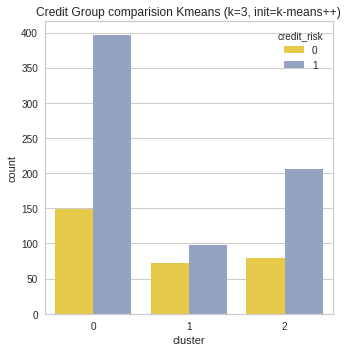

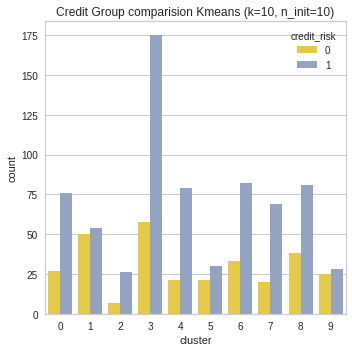

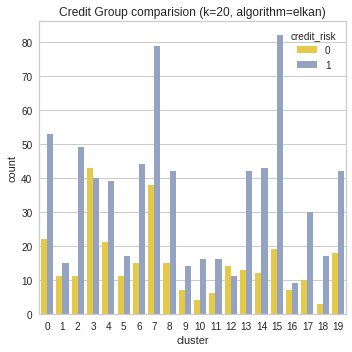

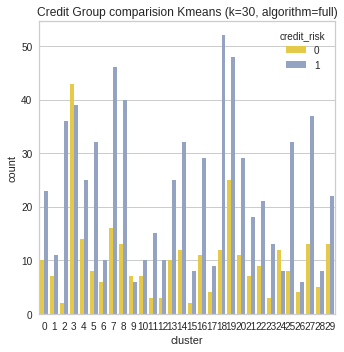

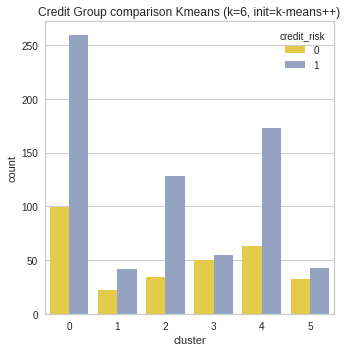

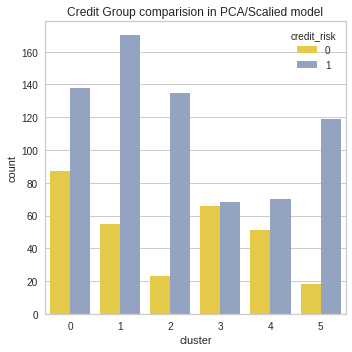

In [35]:
#Group Credit risk group composition 


#model 1. Kmeans (k=3, init="k-means++")
plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df4, palette="Set2_r")
plt.title(f"Credit Group comparision Kmeans (k=3, init=k-means++)")
plt.tight_layout()
plt.show()


#model 2 Kmeans (k=10, n_init=10)
plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df5, palette="Set2_r")
plt.title(f"Credit Group comparision Kmeans (k=10, n_init=10)")
plt.tight_layout()
plt.show()

#model 3 Kmeans (k=20, algorithm="elkan")
plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df6, palette="Set2_r")
plt.title(f"Credit Group comparision (k=20, algorithm=elkan)")
plt.tight_layout()
plt.show()

#model 4 Kmeans (k=30, algorithm="full")
plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df7, palette="Set2_r")
plt.title(f"Credit Group comparision Kmeans (k=30, algorithm=full)")
plt.tight_layout()
plt.show()

#model 5. Kmeans (k=6, init="k-means++")
plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df1, palette="Set2_r")
plt.title(f"Credit Group comparison Kmeans (k=6, init=k-means++)")
plt.tight_layout()
plt.show()

#model 6. Kmeans 

plt.figure(figsize = (5,5))
sns.countplot(x='cluster',hue='credit_risk',data=df, palette="Set2_r")
plt.title(f"Credit Group comparision in PCA/Scalied model")
plt.tight_layout()
plt.show()



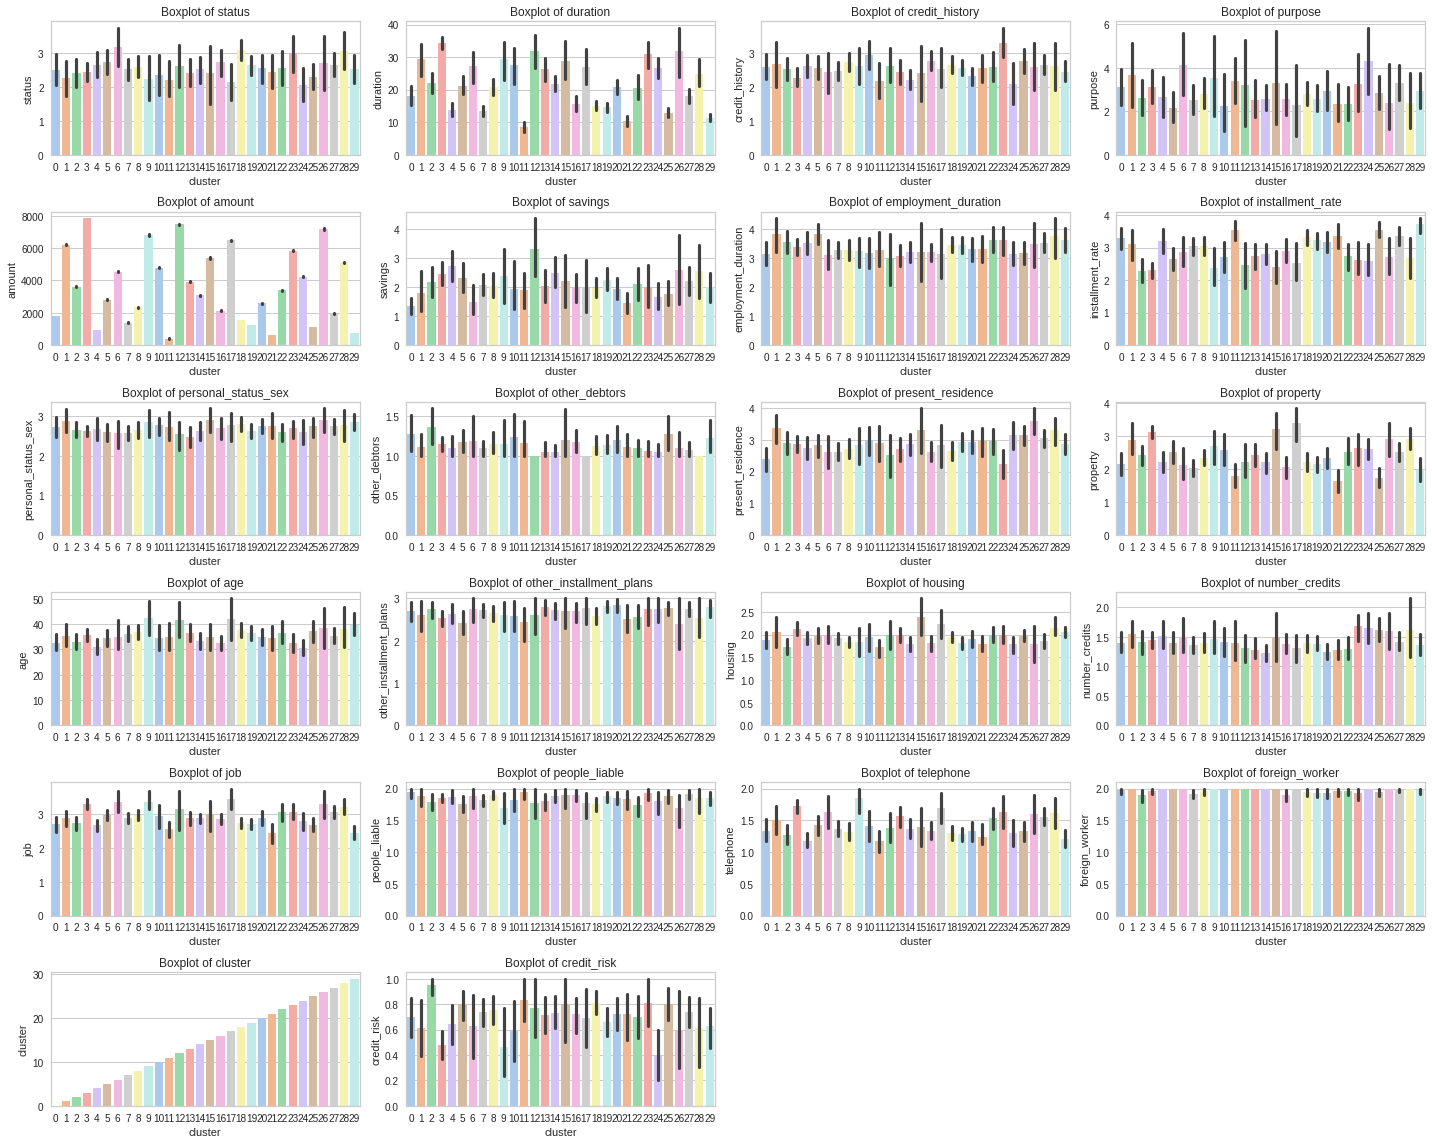

In [36]:
plt.figure(figsize = (20,16))
Features = df7.columns
for i in range(len(Features)):
    plt.subplot(6,4, i + 1)
    sns.barplot(x = 'cluster', y = df7[Features[i]], data = df7, palette="pastel")
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()